## Ways -
1. Most Frequent --mode
   - one category should dominate over other
3. Missing category imputation
## Assumption
- MCAR

# Frequency Value Imputation

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv(r"C:\Users\Admin\Documents\Jupyter Notebook\Machine Learning (CampusX)\Dataset\housing.csv",usecols=['GarageQual','FireplaceQu','SalePrice'])

In [14]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [15]:
df.columns

Index(['FireplaceQu', 'GarageQual', 'SalePrice'], dtype='object')

In [16]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<Axes: xlabel='GarageQual'>

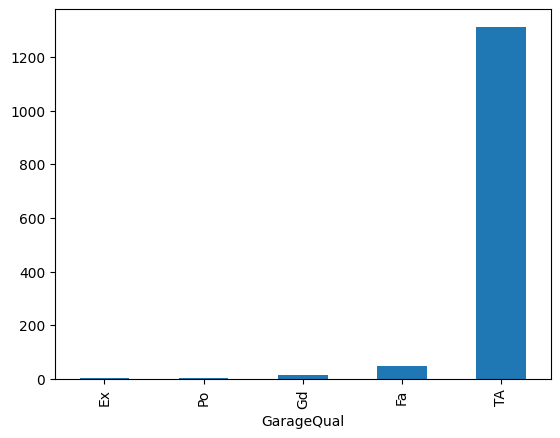

In [17]:
df['GarageQual'].value_counts().sort_values(ascending=True).plot.bar()

In [18]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

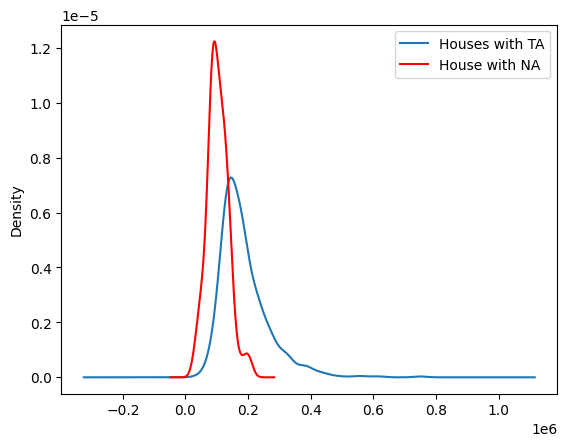

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax =ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='r')

lines,labels = ax.get_legend_handles_labels()
label = ['Houses with TA','House with NA']
ax.legend(lines, label,loc='best')

In [24]:
temp = df[df['GarageQual']=='TA']['SalePrice']

In [25]:
df['GarageQual'] = df['GarageQual'].fillna('TA')

<Axes: xlabel='GarageQual'>

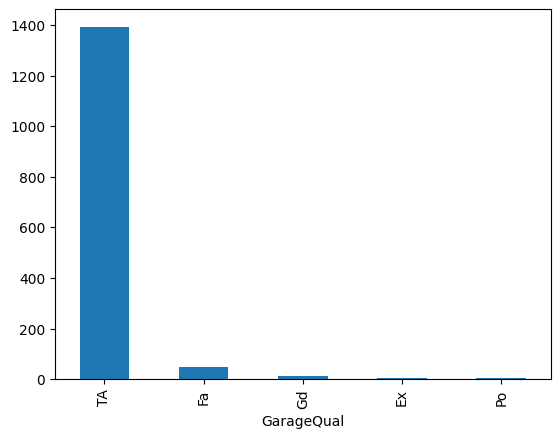

In [26]:
df['GarageQual'].value_counts().plot(kind='bar')

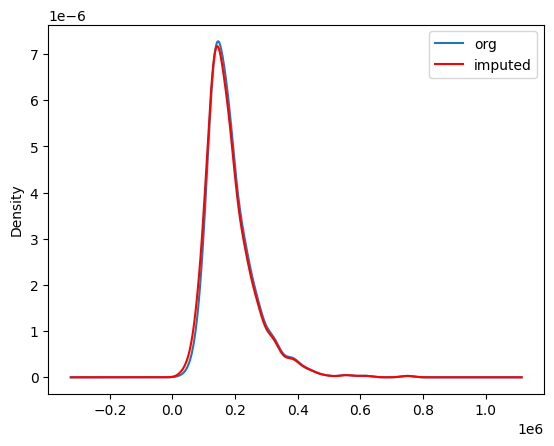

In [31]:
fig = plt.figure()
ax =fig.add_subplot(111)

temp.plot(kind='kde')

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',color='r',ax=ax)
lines,labels = ax.get_legend_handles_labels()
label = ['org','imputed']
ax.legend(lines, label,loc='best')

<Axes: xlabel='FireplaceQu'>

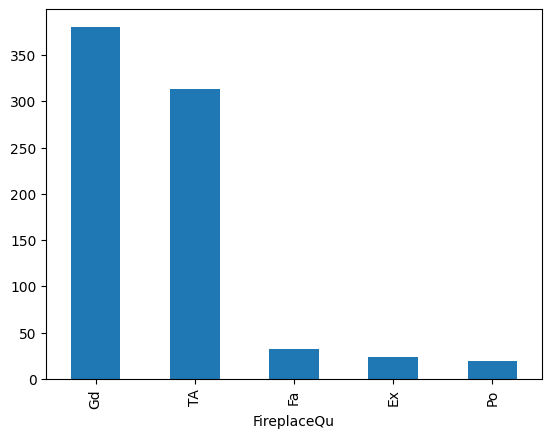

In [33]:
df['FireplaceQu'].value_counts().plot(kind='bar')

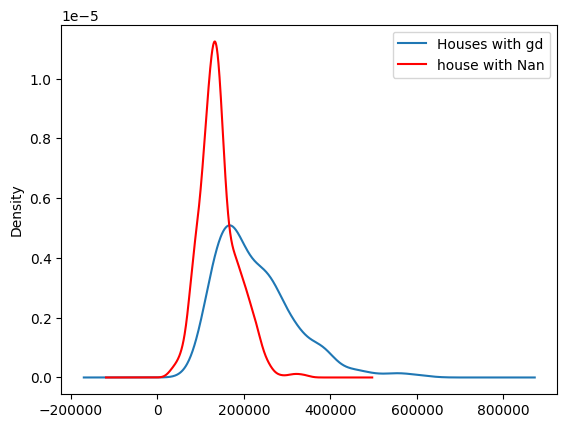

In [36]:
fig = plt.figure()

ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax)
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',ax =ax, color='r')

lines,labels = ax.get_legend_handles_labels()
labels=['Houses with gd', 'house with Nan']
ax.legend(lines,labels,loc='best')


In [37]:
temp1 = df[df['FireplaceQu']=='Gd']['SalePrice']

In [42]:
df['FireplaceQu'].fillna('Gd',inplace=True)

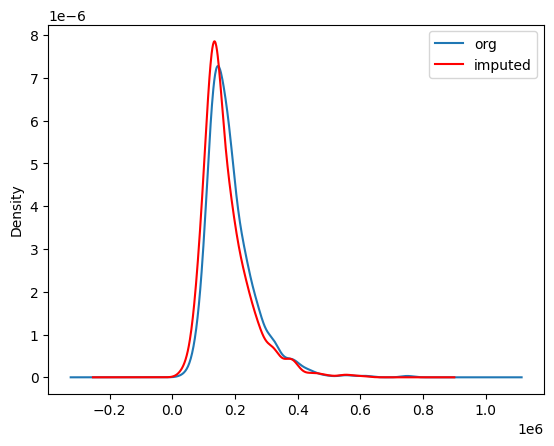

In [43]:
fig = plt.figure()

ax = fig.add_subplot(111)

temp.plot(kind='kde')
df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax =ax, color='r')

lines,labels = ax.get_legend_handles_labels()
labels=['org', 'imputed']
ax.legend(lines,labels,loc='best')


In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(['SalePrice'],axis=1),df['SalePrice'],random_state=0,test_size=0.3)

In [48]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

In [50]:
X_train= imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


In [51]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)